https://mp.weixin.qq.com/s/Z5DSNUZiAqrB7bXGoiPVoQ

In [1]:
import torch
import matplotlib.pyplot as plt

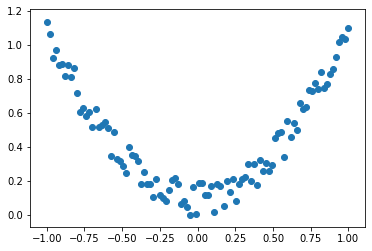

In [2]:
# 建立数据集
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
# 画图
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [3]:
import torch.nn.functional as F

In [4]:
# 建立神经网络
class Net(torch.nn.Module): # 继承torch的Module
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__() # 继承__init__功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature,n_hidden) # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden,n_output) # 输出层线性输出
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
net = Net(n_feature=1,n_hidden=10,n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [6]:
for para in net.parameters():
    print(para)

Parameter containing:
tensor([[-0.5414],
        [-0.1631],
        [ 0.2794],
        [ 0.3957],
        [-0.6965],
        [-0.6932],
        [-0.0801],
        [-0.1429],
        [-0.7280],
        [ 0.2819]], requires_grad=True)
Parameter containing:
tensor([-0.5940, -0.0393,  0.7718, -0.7510,  0.2566, -0.1873, -0.0382,  0.7534,
        -0.4471,  0.7204], requires_grad=True)
Parameter containing:
tensor([[ 0.1201,  0.1047, -0.1835,  0.1600, -0.0549, -0.0190, -0.1254, -0.2375,
         -0.2937, -0.0438]], requires_grad=True)
Parameter containing:
tensor([-0.0540], requires_grad=True)


In [5]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

hidden.weight : torch.Size([10, 1])
hidden.bias : torch.Size([10])
predict.weight : torch.Size([1, 10])
predict.bias : torch.Size([1])


In [6]:
# 训练网络 
optimizer = torch.optim.SGD(net.parameters(),lr=0.2) # optimizer是训练的工具，出入net的所有参数，学习率
loss_func = torch.nn.MSELoss() # 预测值和真实值的误差计算公式
for epoch in range(100):
    prediction = net(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad() # 清空上一步的残余更新参数值
    loss.backward() # 误差反向传播，计算参数更新值
    optimizer.step() # 将误差更新值施加到net的参数上

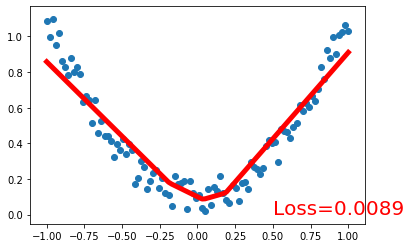

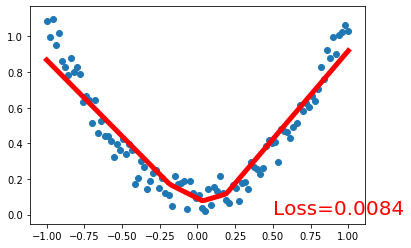

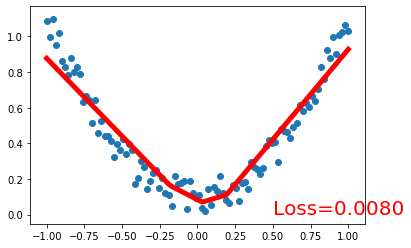

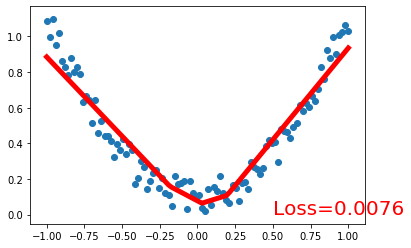

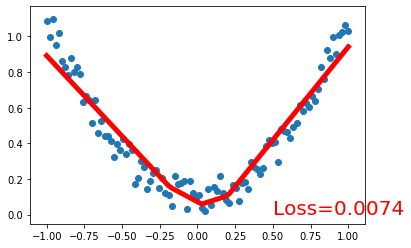

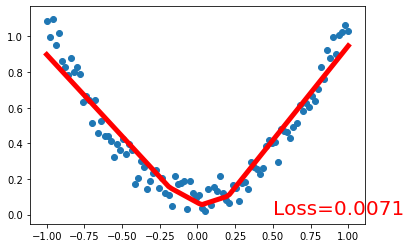

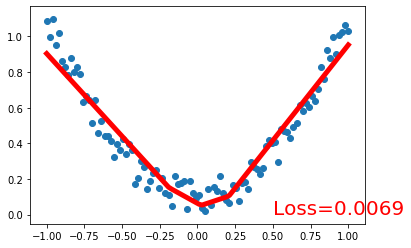

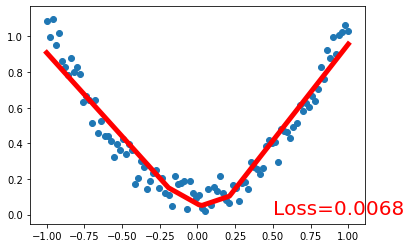

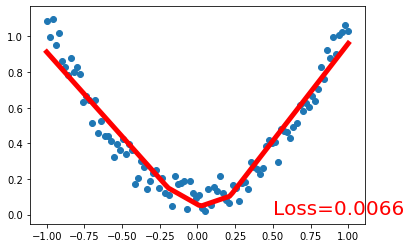

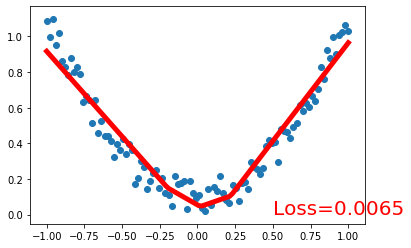

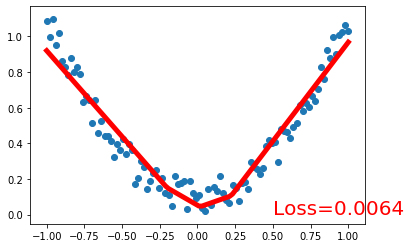

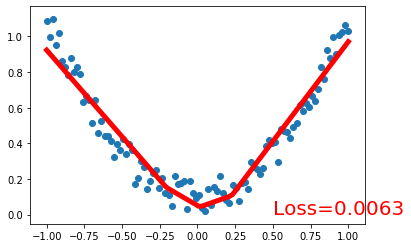

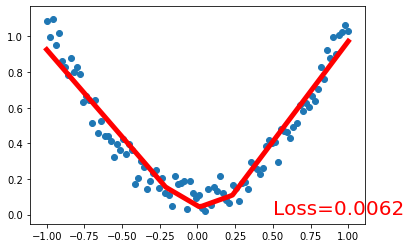

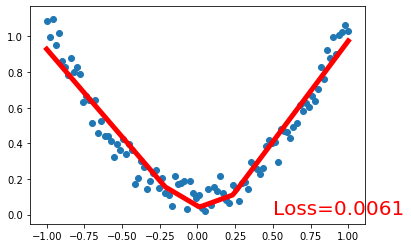

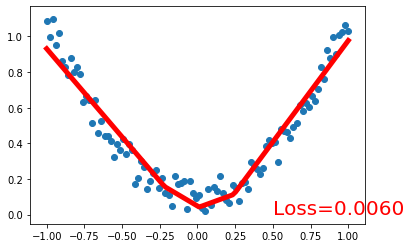

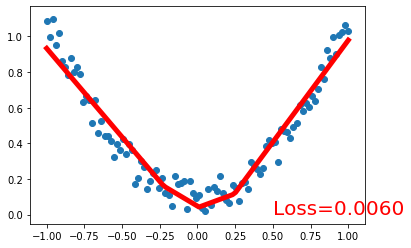

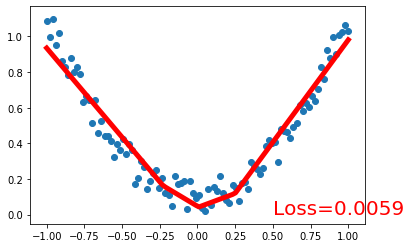

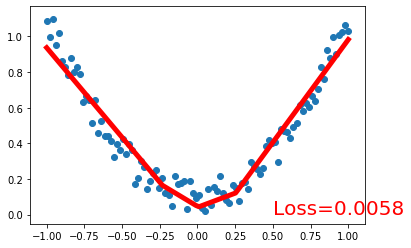

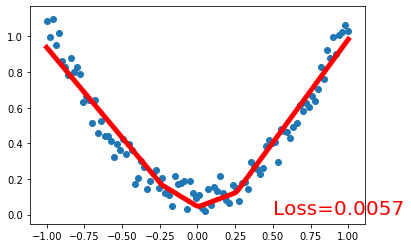

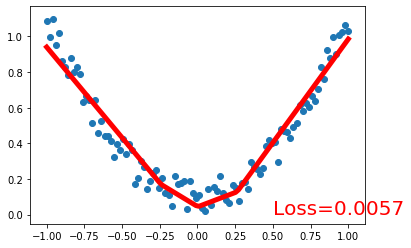

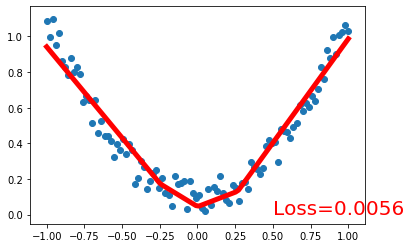

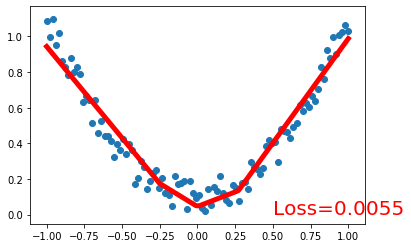

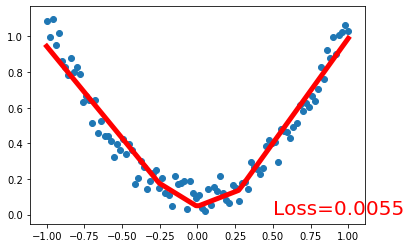

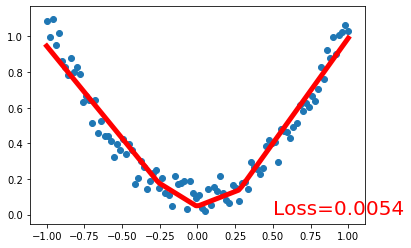

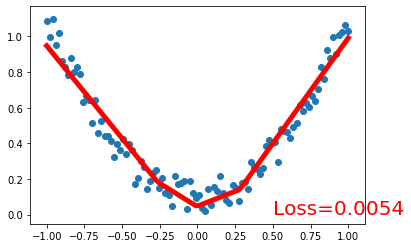

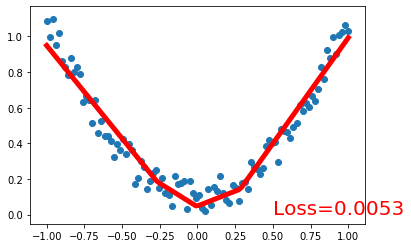

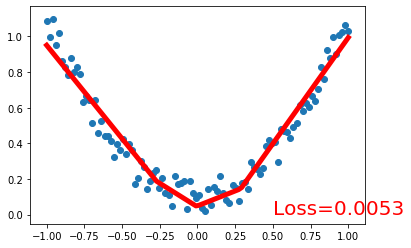

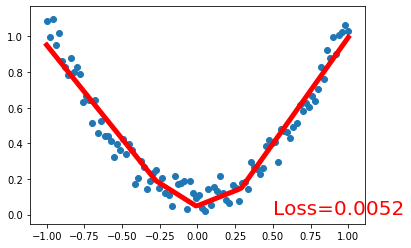

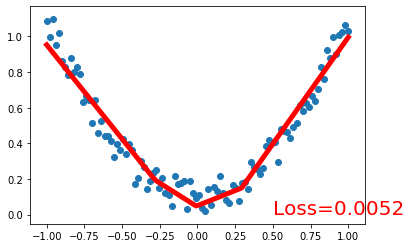

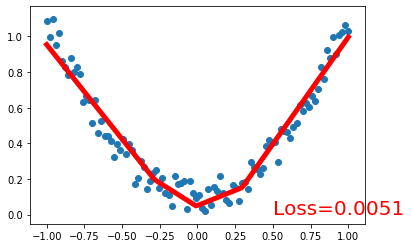

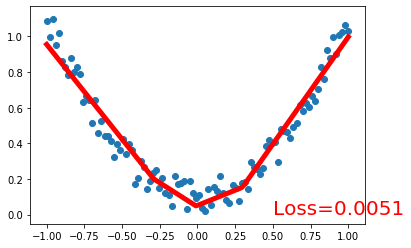

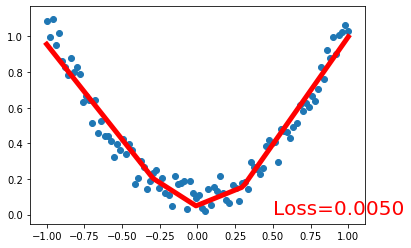

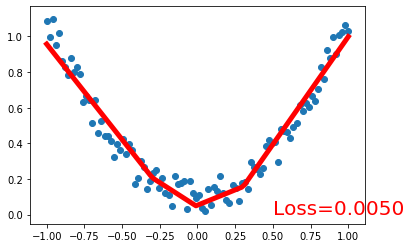

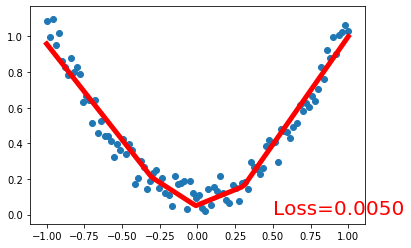

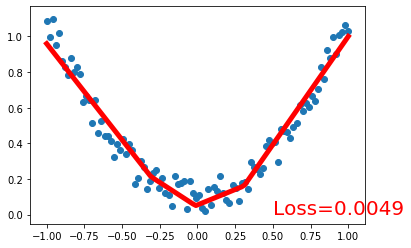

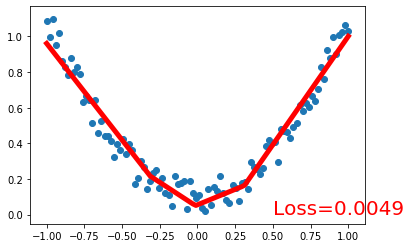

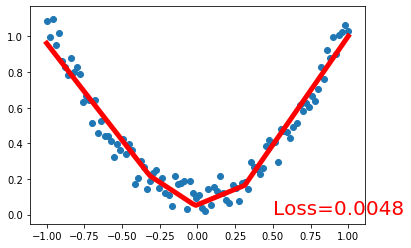

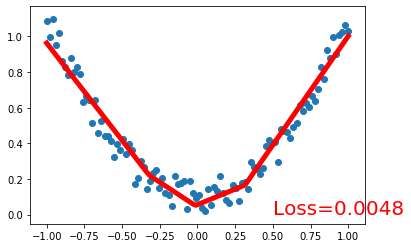

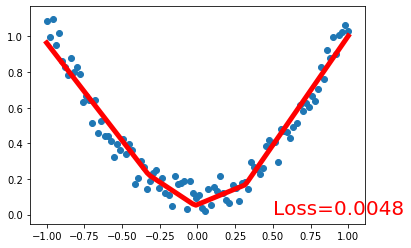

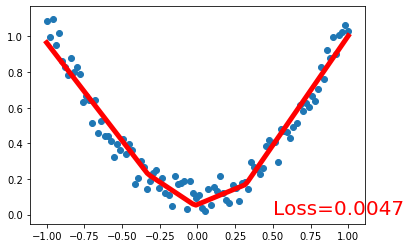

In [7]:
# 可视化训练过程
optimizer = torch.optim.SGD(net.parameters(),lr=0.2) # optimizer是训练的工具，出入net的所有参数，学习率
loss_func = torch.nn.MSELoss() # 预测值和真实值的误差计算公式
plt.ion() # 画图
plt.show()
for epoch in range(200):
    prediction = net(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss=%.4f'%loss.data.numpy(), fontdict={'size':20,'color':'red'})
        plt.pause(0.1)